# Data Analysis Capstone Project 1
## Jayapura Team 3

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data
##### Membaca data dari file Excel
data = pd.read_excel("C:/Users/Lenovo/Capstone Project RevoU/vending_machine_sales.xlsx")

data

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,2022-01-01,Credit,148,3.5,1,148,3.5,1,3.5,3.5,2022-01-01
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,2022-01-01,Credit,148,3.5,1,148,3.5,1,3.5,5.0,2022-01-01
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,2022-01-01,Credit,123,1.5,1,123,1.5,1,1.5,5.0,2022-01-01
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,2022-01-01,Credit,123,1.5,1,123,1.5,1,1.5,1.5,2022-01-01
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,2022-01-01,Credit,148,3.5,1,148,3.5,1,3.5,3.5,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9345,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Doritos Nacho Cheese,Food,16175373362,2022-12-30,Cash,112,1.5,1,112,1.5,1,1.5,1.5,2022-12-30
9346,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Poland Springs Water,Water,16176802941,2022-12-31,Cash,143,1.5,1,143,1.5,1,1.5,1.5,2022-12-31
9347,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Robert Irvine's - Fit Crunch - Chocolate Pea,Food,16176909481,2022-12-31,Cash,137,2.0,1,137,2.0,1,2.0,2.0,2022-12-31
9348,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Poland Springs Water,Water,16176914301,2022-12-31,Cash,143,1.5,1,143,1.5,1,1.5,1.5,2022-12-31


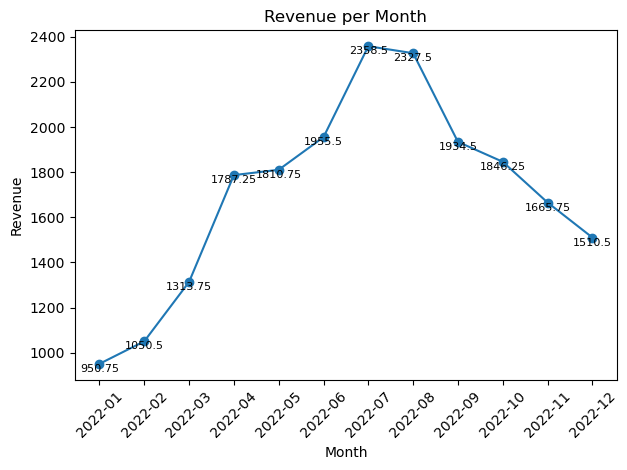

In [3]:
# Revenue per Month All Location
##### Mengonversi kolom 'TransDate' menjadi tipe datetime
data['TransDate'] = pd.to_datetime(data['TransDate'])

##### Membuat kolom baru untuk bulan
data['Month'] = data['TransDate'].dt.to_period('M')

##### Mengelompokkan data berdasarkan bulan dan menghitung total revenue per bulan
revenue_per_month = data.groupby('Month')['TransTotal'].sum()

##### Menampilkan plot revenue per bulan
plt.plot(revenue_per_month.index.astype(str), revenue_per_month.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue per Month')
plt.xticks(rotation=45)
plt.tight_layout()

for i, txt in enumerate(revenue_per_month.values):
    plt.text(revenue_per_month.index.astype(str)[i], txt, str(round(txt, 2)), ha='center', va='top', fontsize=8)

plt.show()

**REVENUE DECREASED**

Penjualan vending machine di central New Jersey menurun sejak bulan Juli (`$2358,5`) hingga Desember (`$1510,5`) sebesar 35,98%.

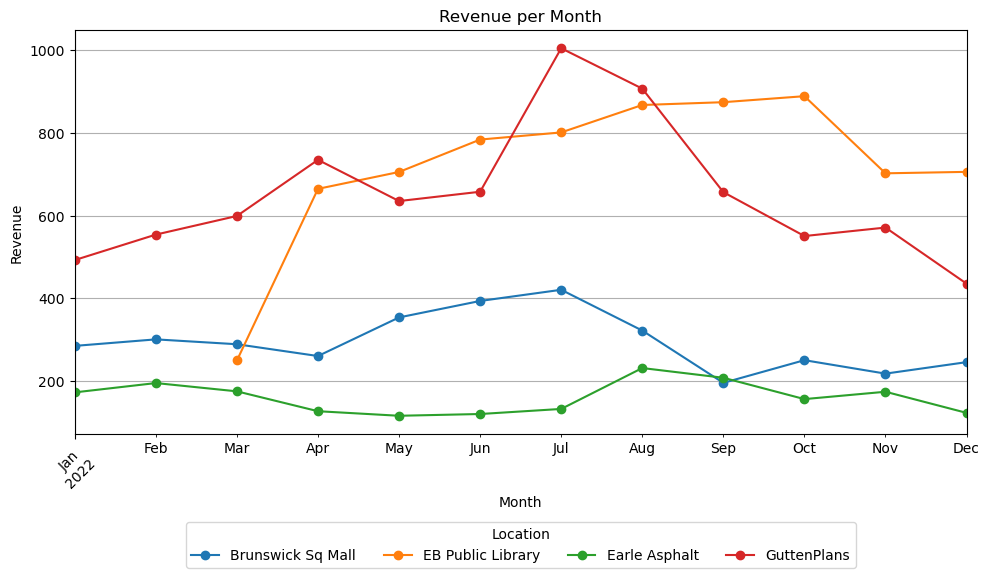

In [4]:
# Revenue per Month
##### Mengonversi kolom 'TransDate' menjadi tipe datetime
data['TransDate'] = pd.to_datetime(data['TransDate'])

##### Membuat kolom baru untuk bulan
data['Month'] = data['TransDate'].dt.to_period('M')

##### Membuat pivot table untuk mengelompokkan data berdasarkan lokasi dan bulan, dan menghitung total revenue per bulan untuk setiap lokasi
revenue_per_month_by_location = data.pivot_table(index='Month', columns='Location', values='TransTotal', aggfunc='sum')

##### Membuat plot untuk setiap lokasi
revenue_per_month_by_location.plot(marker='o', figsize=(10, 6))

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue per Month')
plt.xticks(rotation=45)
plt.legend(title='Location', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=len(revenue_per_month_by_location.columns))
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**

* Gutten Plans adalah vending machine dengan rata-rata pendapatan per bulan tertinggi.
* Pendapatan Gutten Plans dan EB Public Library cenderung lebih tinggi.
* Earle Asphalt memiliki rata-rata pendapatan terendah.
* Angka pendapatan Gutten Plans dan Brunswick Sq Mall menurun sejak bulan Juli, sedangkan Earle Asphalt dan EB Public Library menurun sejak bulan November.


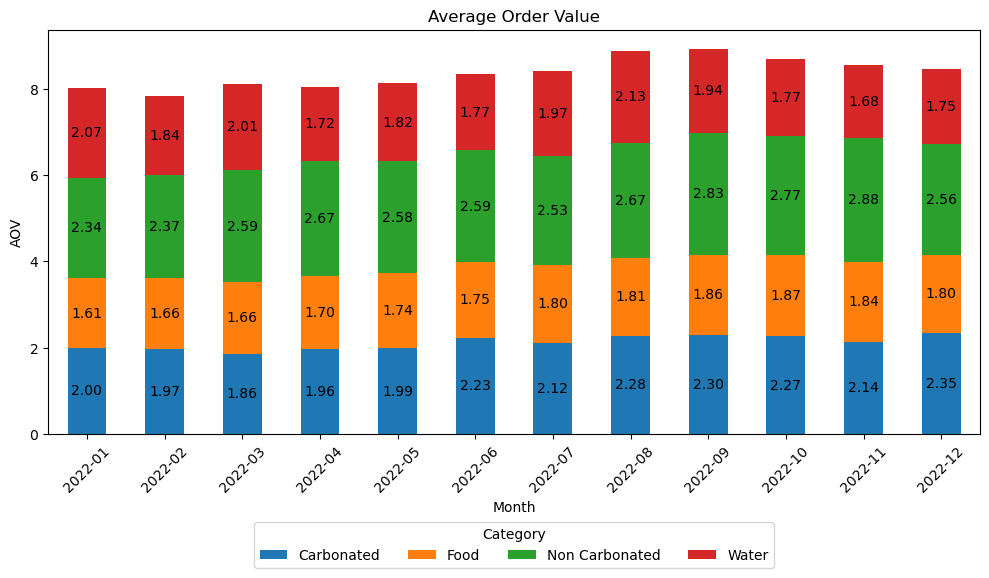

In [5]:
# Average Order Value (AOV)
##### Membuat pivot table untuk mengelompokkan data berdasarkan bulan, kategori produk, dan menghitung rata-rata LineTotal
average_order_value = data.pivot_table(index='Month', columns='Category', values='LineTotal', aggfunc='mean')

##### Membuat plot stacked kolom
ax = average_order_value.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Month')
plt.ylabel('AOV')
plt.title('Average Order Value')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=len(average_order_value.columns))
plt.tight_layout()

##### Iterate through each container
for c in ax.containers:
    labels = [f'{v.get_height():.2f}' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')


plt.show()

**Insight**

* Nilai pesanan rata-rata dengan rentang nilai tertinggi yaitu kategori Non-Carbonated Drink, dengan nilai $2,34 - $2,83.
* Nilai pesanan rata-rata dengan kisaran nilai terendah milik kategori Makanan dengan nilai $1,61 - $1,87.

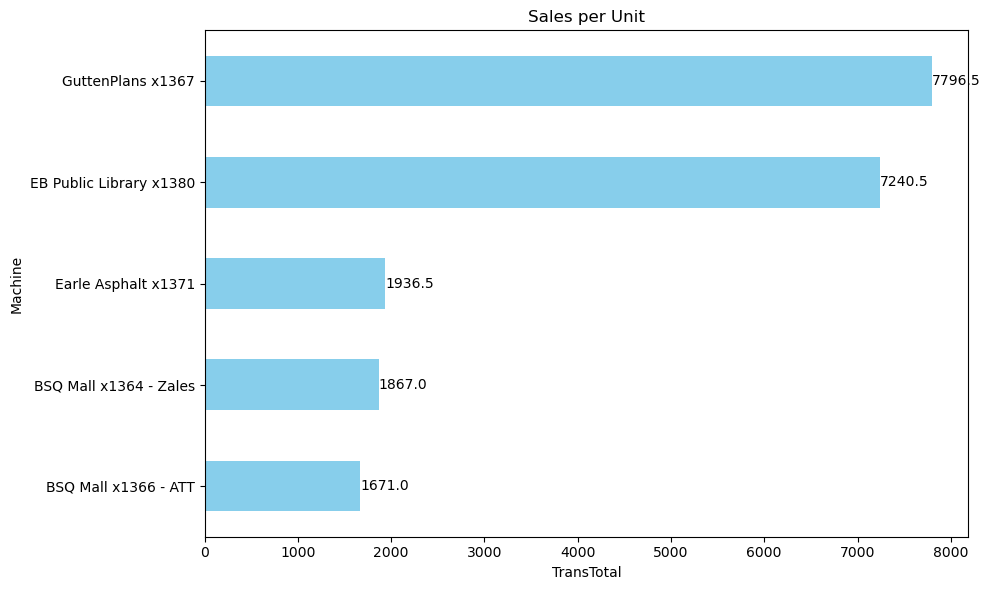

In [6]:
# Sales per Unit
##### Group data by Machine and calculate sum of TransTotal for each Machine
sales_per_unit = data.groupby('Machine')['TransTotal'].sum()

##### Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sales_per_unit.sort_values().plot(kind='barh', color='skyblue')

plt.xlabel('TransTotal')
plt.ylabel('Machine')
plt.title('Sales per Unit')

##### Add data labels to each bar
for i, v in enumerate(sales_per_unit.sort_values()):
    plt.text(v, i, f'{v:.1f}', ha='left', va='center')

plt.tight_layout()

plt.show()

**Insight**

* GuttenPlans x1367 Memiliki total penjualan tertinggi sebesar `$7796,5` diikuti oleh EBPublic Library x1380 dengan total penjualan `$7240,5`.
* BSQ Mall x1366 memiliki total penjualan senilai `$1671` merupakan nilai terendah dibandingkan dengan unit lainnya.


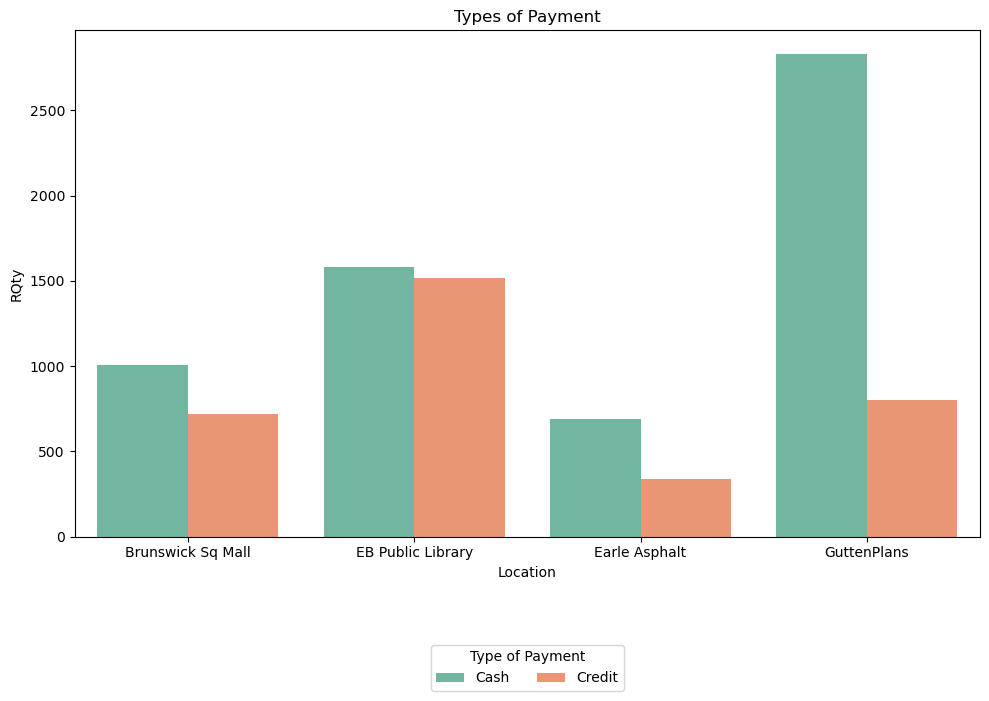

In [7]:
# Types of Payment
##### Group data by Location, Type, and sum of RQty
payment_data = data.groupby(['Location', 'Type'])['RQty'].sum().reset_index()

##### Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_data, x='Location', y='RQty', hue='Type', palette='Set2')

plt.xlabel('Location')
plt.ylabel('RQty')
plt.title('Types of Payment')

plt.tight_layout()

plt.legend(title='Type of Payment', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=len(average_order_value.columns))

plt.show()

**Insight**

* Dari keseluruhan pembayaran cash mendominasi dibandingkan dengan kredit 

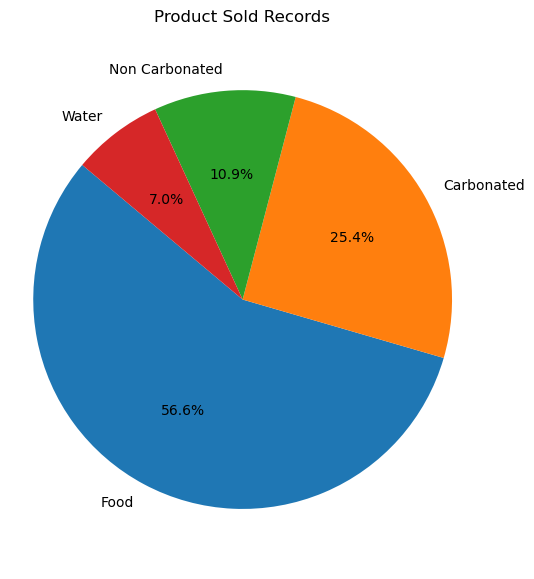

In [8]:
# Product Sold Records
##### Group data by Category and count the records in each category
product_counts = data['Category'].value_counts()

##### Create a pie chart
plt.figure(figsize=(6, 7))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Product Sold Records')

plt.axis('equal')

plt.show()

**Insight**

* Produk kategori makanan adalah produk yang paling banyak terjual diikuti oleh minuman berkarbonasi dan produk non-karbonasi dan air diposisi terakhir 

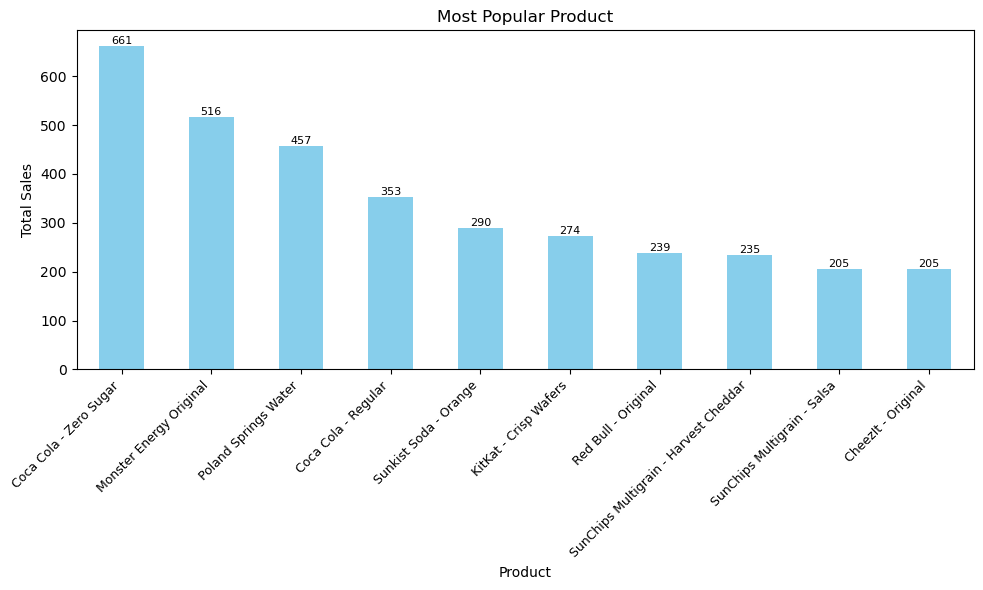

In [9]:
# Most Popular Product
##### Group data by Product and sum the sales for each product
product_sales = data.groupby('Product')['RQty'].sum()

##### Sort the products by total sales and select the top 10 products
top_10_products = product_sales.sort_values(ascending=False).head(10)

##### Create a bar plot
plt.figure(figsize=(10, 6))
bars = top_10_products.plot(kind='bar', color='skyblue')

plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Most Popular Product')

plt.xticks(rotation=45, fontsize=9 , ha='right')  ##### Rotate x-axis labels and align them to the right

##### Add labels at the center of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(bar.get_height(), 2)), 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()

plt.show()

**Insight**

* Coca Cola - Zero Sugar merupakan produk paling populer diikuti oleh Monster energy original di posisi ke-2

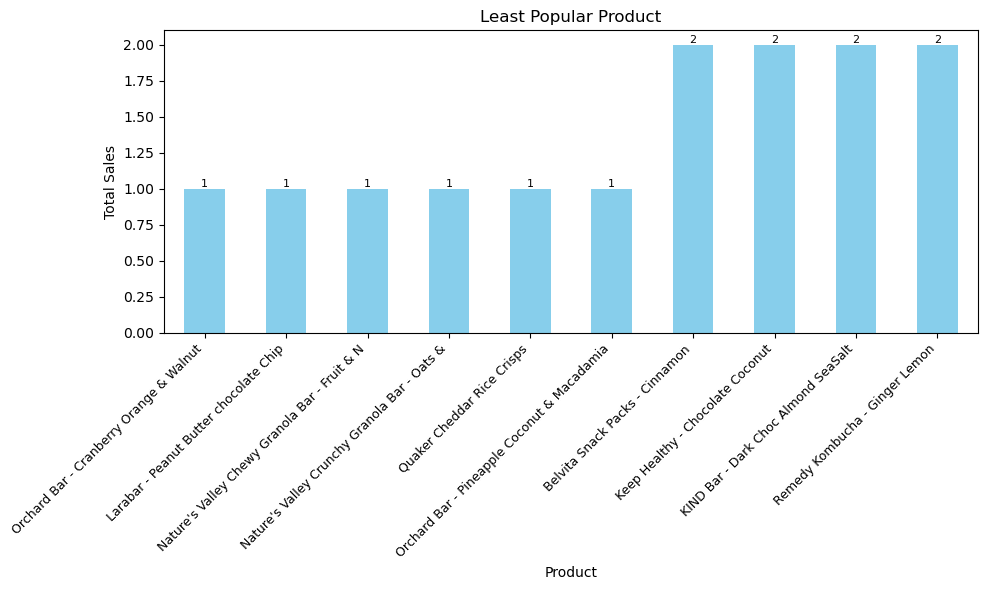

In [10]:
# Least Popular Product
##### Group data by Product and sum the sales for each product
product_sales = data.groupby('Product')['RQty'].sum()

##### Sort the products by total sales in ascending order and select the bottom 10 products
bottom_10_products = product_sales.sort_values().head(10)

##### Create a bar plot
plt.figure(figsize=(10, 6))
bars = bottom_10_products.plot(kind='bar', color='skyblue')

plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Least Popular Product')

plt.xticks(rotation=45, fontsize=9 , ha='right')  ##### Rotate x-axis labels and align them to the right

##### Add labels at the center of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(bar.get_height(), 2)), 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()

plt.show()

**Insight**

Terdapat 6 produk dengan jumlah paling sedikit total penjualannya, yang hanya terjual satu kali di semua lokasi, seperti:
* Larabar - Peanut Butter 
* Nature’s Valley Chewy
* Nature’s Valley Crunchy
* Nature’s Valley Cranberry
* Orchad Bar - Pineapple
* Quaker Cheddar Rice Crisps
